# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [353]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import ops
from keras.layers import Dense
import math
import os, numpy as np, tensorflow as tf

from keras.utils import plot_model 

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [354]:
# Read data file and split into training and test set
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Divide dataset into features and targets
X_train = train[["x0","x1"]]
y_train = train["y"]
X_train = train[["x0","x1"]]
y_train = train["y"]

# Create Seed for Repetability
os.environ["PYTHONHASHSEED"] = "0"
tf.keras.utils.set_random_seed(42)

# Create model
model = keras.models.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(Dense(16, activation="relu", name="layer1"))
model.add(Dense(32, activation="relu", name="layer2"))
model.add(Dense(64, activation="relu", name="layer3"))
model.add(Dense(32, activation="relu", name="layer4"))
model.add(Dense(32, activation="relu", name="layer5"))
model.add(Dense(2, activation="softmax", name="output"))

model.summary()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer5 (Dense)                  │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,906 (23.07 KB)

 Trainable params: 5,906 (23.07 KB)

 Non-trainable params: 0 (0.00 B)

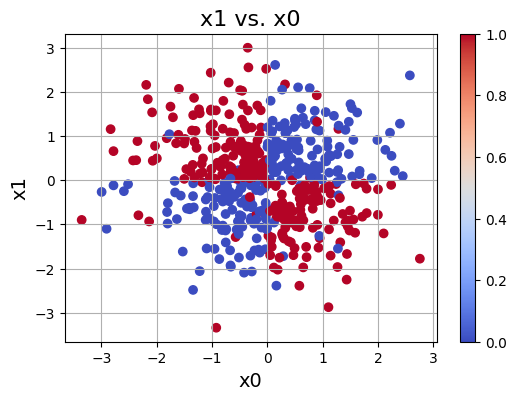

In [355]:
# Plot normal dataset
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [ ]:
# Train the neural network using a warmup + cosine decay learning rate scheduler and early stopping.
# The scheduler gradually increases the learning rate for the first few epochs (warmup),
# then smoothly decreases it using a cosine function. Early stopping halts training if validation
# performance does not improve for several epochs, restoring the best weights.
def make_warmup_cosine_scheduler(warmup_epochs, total_epochs, base_lr):
    def schedule(epoch, lr):
        if epoch < warmup_epochs: 
            return base_lr * (epoch + 1) / warmup_epochs
        t = (epoch - warmup_epochs) / max(1, (total_epochs - warmup_epochs))
        return 0.5 * base_lr * (1 + math.cos(math.pi * t))
    return schedule


total_epochs = 64
# Create callbacks for learning rate scheduling and early stopping
cb_lr = keras.callbacks.LearningRateScheduler(
    make_warmup_cosine_scheduler(warmup_epochs=5, total_epochs=total_epochs, base_lr=1e-3)
)
cb_es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=32, callbacks=[cb_lr,cb_es], epochs=total_epochs)
#history = model.fit(X_train, y_train, batch_size=32, epochs=total_epochs)

X_test = test[["x0","x1"]]
y_test = test["y"]

model.evaluate(X_test, y_test)



Epoch 1/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4760 - loss: 0.6884 - learning_rate: 2.0000e-04
Epoch 2/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6620 - loss: 0.6745 - learning_rate: 4.0000e-04
Epoch 3/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8080 - loss: 0.6490 - learning_rate: 6.0000e-04
Epoch 4/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.5916 - learning_rate: 8.0000e-04
Epoch 5/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8960 - loss: 0.4789 - learning_rate: 0.0010
Epoch 6/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9160 - loss: 0.3573 - learning_rate: 0.0010
Epoch 7/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 0.3046 - learning_rate: 9.9929e-04
Epoch 8/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9340 - loss: 0.2883 - learning_rate: 9.9717e-04
Epoch 9/64
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.1453

/Users/jacoblein/Documents/femteSemester/IntroML/.venv/lib/python3.13/site-packages/keras/src/callbacks/early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 0.2814 - learning_rate: 9.9363e-04
Epoch 10/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9400 - loss: 0.2767 - learning_rate: 9.8870e-04
Epoch 11/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9400 - loss: 0.2722 - learning_rate: 9.8238e-04
Epoch 12/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.9400 - loss: 0.2694 - learning_rate: 9.7470e-04
Epoch 13/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.9400 - loss: 0.2662 - learning_rate: 9.6567e-04
Epoch 14/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9400 - loss: 0.2635 - learning_rate: 9.5532e-04
Epoch 15/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.9420 - loss: 0.2609 - learning_rate: 9.4368e-04
Epoch 16/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9400 - loss: 0.2587 - learning_rate: 9.3078e-04
Epoch 17/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.9400 - loss: 0.2566 - learning_

[0.27190637588500977, 0.9200000166893005]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


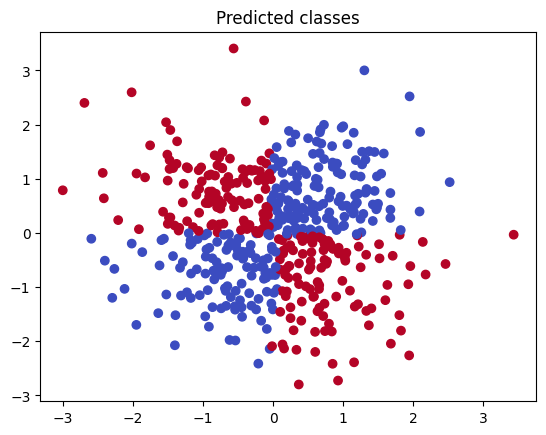

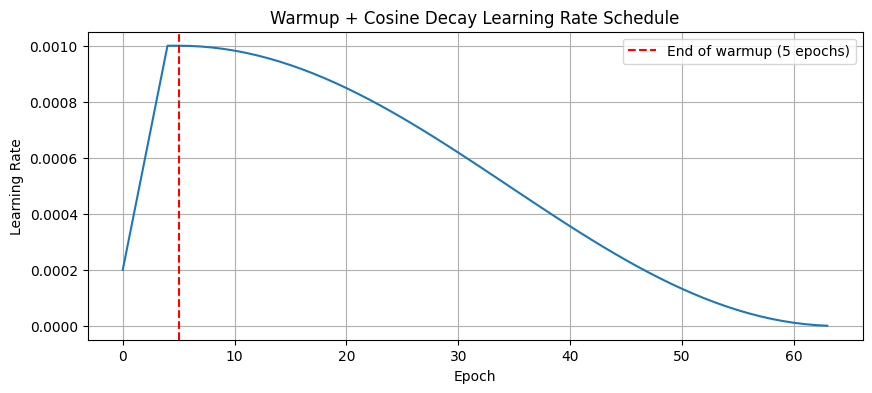

Python(37032) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(37034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


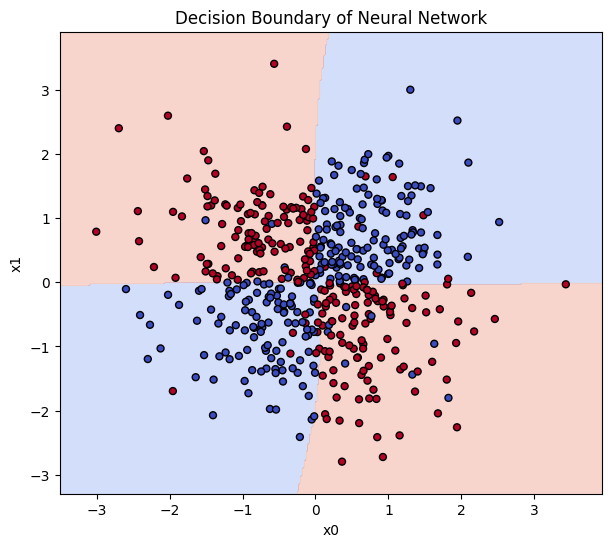

In [357]:
# Plot the predictions of the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.scatter(X_test["x0"], X_test["x1"], c=y_pred_classes, cmap="coolwarm")
plt.title("Predicted classes")
plt.show()

# Plot learning rate compared to epochs
epochs = range(total_epochs)
lr_values = [make_warmup_cosine_scheduler(warmup_epochs=5, total_epochs=total_epochs, base_lr=1e-3)(epoch, None) for epoch in epochs]

plt.figure(figsize=(10, 4))
plt.plot(epochs, lr_values)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Warmup + Cosine Decay Learning Rate Schedule')
plt.grid(True)
plt.axvline(x=5, color='r', linestyle='--', label=f'End of warmup (5 epochs)')
plt.legend()
plt.show()

plot_model(model, show_shapes=True, to_file="model.png")

# Plot Decision boundary of neural network 
X_test2 = X_test.to_numpy(np.float32)
y_test2 = y_test.to_numpy(np.int32)

x0_min, x0_max = X_test2[:, 0].min() - 0.5, X_test2[:, 0].max() + 0.5
x1_min, x1_max = X_test2[:, 1].min() - 0.5, X_test2[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x0_min, x0_max, 300),
    np.linspace(x1_min, x1_max, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.argmax(model.predict(grid_points, verbose=0), axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, levels=2, alpha=0.3, cmap="coolwarm")

plt.scatter(X_test2[:, 0], X_test2[:, 1], c=y_test, cmap="coolwarm", s=25, edgecolors="k")
plt.title("Decision Boundary of Neural Network")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()


**Discussion** 

**Task A -**

- How can you make sure the results are reproducable?
   - The accuracy varies between runs because neural networks use random initialization and data shuffling during training.
      To make the results more reproducible, we can fix the random number generator seeds used by Python, NumPy, and TensorFlow. This ensures that the same random values (for weights, shuffling, etc.) are generated each time we run the model.
      It is also possible to run the model on fixed validation, training and test datasets.
- Visualize the network's architecture and decision boundary.
   - The visualization of the network's architecture and decision boundaries are shown above.
- Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - I chose to use Adam (Adaptive Moment Estimation) optimizer. SGD (Stochastic Gradient Descent) is an optimizer which uses the gradient of the loss for each parameter and a fixed learning rate for all parameters. Adam is a more advanced method which keeps track of the averages of the past gradients for smoother updates and uses the averages of past squared gradients to have an adaptive learning rate.
- Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Using the warmup + cosine decay scheduler gave a slightly smoother and faster training process, and the final accuracy improved a little compared to using a fixed learning rate.
   This happens because the warmup allows the model to start learning gradually (avoiding unstable updates early on), while the cosine decay reduces the learning rate over time, helping the model fine-tune its weights toward the end of training.
- Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.
   - More layers = overfitting, reduction when comparing to testset
   - Less layers = underfitting, (less accuracy)
   - More nodes = overfitting
   - Less nodes = underfitting (less accuracy) 


# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [ ]:
# Hmmmmm, why is the first row skipped?
#, skiprows=1, header=None
import re
data = pd.read_csv('unsupervised_data.csv')   # ingen skiprows

# Sort columns based on the numeric index at the end of each column name
idx = [int(re.search(r'(\d+)$', c).group(1)) for c in data.columns]
order = np.argsort(idx)
data_sorted = data.iloc[:, order] 


In [359]:
def show_row_as_image(df, row_index, size=128, k=-1, cmap='gray'):
    """
    Shows a specific row from the DataFrame as a reconstructed image.

    Args:
        df (pd.DataFrame): DataFrame where each row represents a flattened image.
        row_index (int): Index of the row to visualize.
        size (int): Size of one side of the square image (default is 128 for 128x128).
        k (int): Number of 90-degree rotations to apply (default is -1 for one counter-clockwise rotation).
        cmap (str): Colormap to use for displaying the image (default is 'gray').

    """
  
    row = df.iloc[row_index].values.reshape(size, size)
    
    row_rotated = np.rot90(row, k=k)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(row_rotated, cmap=cmap)
    plt.colorbar()
    plt.title(f"Row {row_index} reconstructed as {size}x{size} grid")
    plt.axis("off")
    plt.show()

In [360]:
#show_row_as_image(data_sorted, row_index=0) 

In [361]:
#show_row_as_image(data_sorted, row_index=16)

In [362]:
#show_row_as_image(data_sorted, row_index=1)

In [363]:
#show_row_as_image(data_sorted, row_index=4)

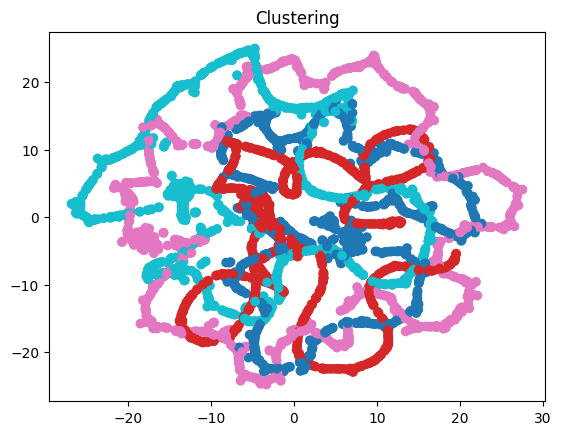

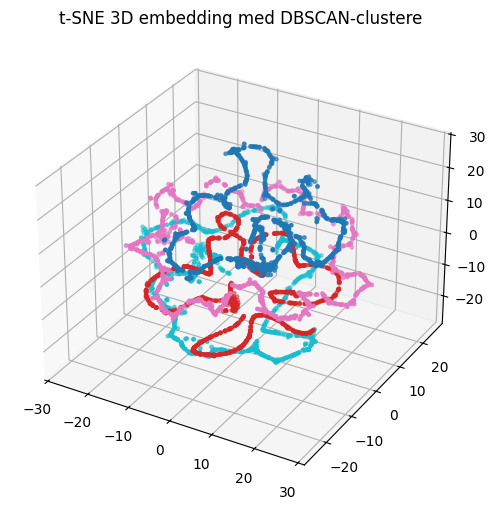

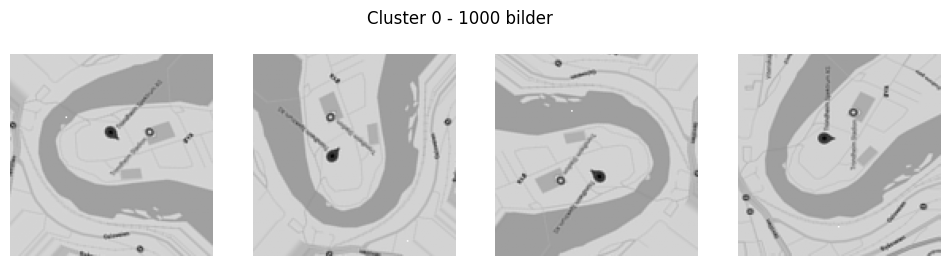

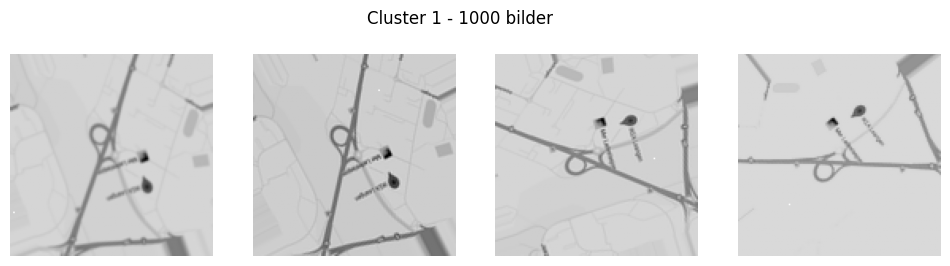

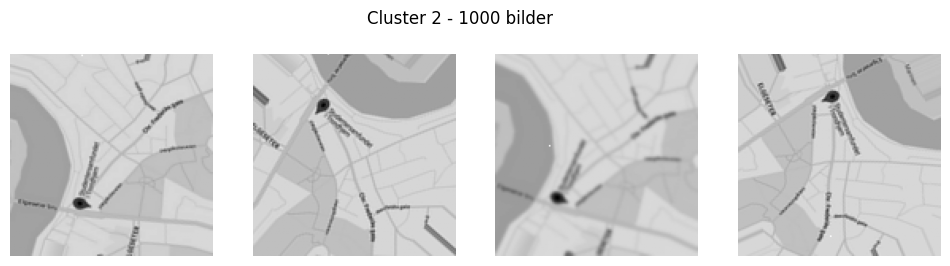

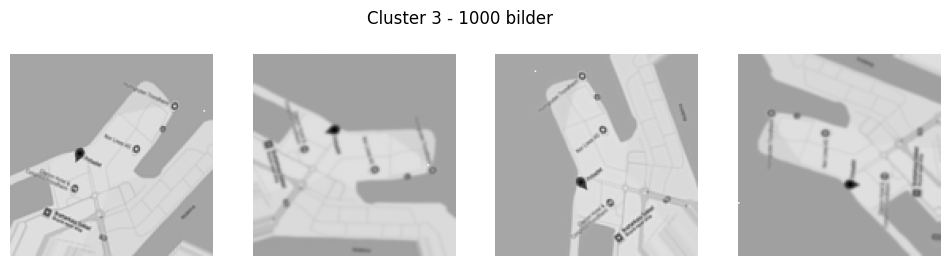

In [364]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
# T-SNE and DBSCAN implementation here.

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sorted)

"""pca = PCA(n_components=60, random_state=42)
X_pca = pca.fit_transform(data_scaled)
print("Forklart varians:", pca.explained_variance_ratio_.sum())
"""
# Dimension reduction with t-SNE (Might take too much time or effort?)
# 25 perplexity = one long sausage?
# 3 perplexity = many small
# 5 perplexity = better
tnse = TSNE(n_components=3, learning_rate='auto', init='pca', perplexity=22, random_state=42)
X_embedded = tnse.fit_transform(data_scaled)

colors = plt.cm.viridis(np.linspace(0,1,10))

"""plt.scatter(X_embedded[:,0], X_embedded[:,1])
plt.title("t-sne of MNIST Data")
plt.show()
"""

clusterer = DBSCAN(eps=3, min_samples=4)
clusters = clusterer.fit_predict(X_embedded)

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=clusters, cmap='tab10')
plt.title("Clustering")
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_embedded[:, 0],
    X_embedded[:, 1],
    X_embedded[:, 2],
    c=clusters,              
    cmap='tab10',           
    s=6
)

ax.set_title("t-SNE 3D embedding med DBSCAN-clustere")
plt.show()


submission = pd.DataFrame({
    "ID": np.arange(len(data_sorted)),
    "cluster": clusters
})


# Visualize some images from each cluster
for cluster_id in np.unique(submission['cluster']):
    plt.figure(figsize=(12, 3))
    cluster_indices = submission[submission['cluster'] == cluster_id].index

    selected = np.random.choice(cluster_indices, size=min(4, len(cluster_indices)), replace=False)

    for i_sel, idx in enumerate(selected):
        plt.subplot(1, 4, i_sel + 1)

        row = data_sorted.iloc[idx].values.reshape(128, 128)
        row_rotated = np.rot90(row, k=-1)

        plt.imshow(row, cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Cluster {cluster_id} - {len(cluster_indices)} bilder')
    plt.show()
    

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.

         My method for discovering that there were four clusters was basically that while tuning hyperparameters for T-SNE and clustering with DBScan and testing on Kaggle I found indications for 4 clusters. Firstly when grouping everything into a single cluster, the Kaggle score dropped to 0.25, which made it quite obvious that there were actually four clusters. This was confirmed after preprocessing the data and visualizing what were assumed to be images, it became clear that there were four distinct locations with different rotations, intensities, etc.

         PCA, t-SNE, and UMAP are all techniques used for analysis or preprocessing with the goal of reducing the dimensionality of a dataset.
         PCA reduces dimensions by finding so-called principal components, which are axes that maximize variance to represent the dataset as effectively as possible.
         t-SNE (t-distributed Stochastic Neighbor Embedding) is a method that first uses probability theory (Gaussian distributions) to determine neighborhood relationships (the probability of points being neighbors). It then uses these probabilities to place the points “randomly” in a lower-dimensional space.
         While t-SNE preserves local relationships, UMAP (Uniform Manifold Approximation and Projection) preserves both local and global structures in the dataset. It does this by first building a graph network of neighboring points and then projecting it so that the distances between similar points are maintained as accurately as possible.

   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
      
         I used DBSCAN for my final solution, but I also implemented a combination of PCA and K-Means to check whether it could give better results. The code for this approach is commented out (below), but with further experimentation, it could likely have been succesfull. I ended up using DBSCAN with an epsilon value of 3 and 4 for min_samples.   

         DBSCAN and K-Means are clustering methods that can also identify anomalies.
         DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points that are densely packed together and marks low-density points as anomalies.
         K-Means, on the other hand, forms clusters based on the distance between cluster centroids and individual data points, and anomalies can be detected as points that lie too far from any centroid.

   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?

         The hidden datatype for this dataset is pictures! Each row is a row of pixle values for the first row of the picture. There are 128^2 columns and 4000 rows. Every row is a picture of 128x128 pixels. This massive number of columns/features can make t-SNE quite slow (which is why I reduced the dimensionality with PCA first). Images also tend to have surprisingly low variance, meaning that many pixels are highly correlated, and the essential structure of the data can often be captured in far fewer dimensions.

   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.

         The servec locations as shown vizualised above are each cluster, which can be read from the pinpoint location: 

         Cluster 1 - Trondheim Spektrum
         Cluster 2 - Ikea Leangen
         Cluster 3 - Studentersamfundet i Trondhjem
         Cluster 4 - Pirbadet

   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [365]:
# PCA and KMeans clustering
# Using PCA to reduce dimensionality before clustering with KMeans
# This approach can help improve clustering performance and reduce computational load.
# But, gets too low accuracy... so went with the solution above instead (Could've tuned more and fixed it probably).
"""

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# Scaler to standardize features before PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sorted)


# PCA to reduce dimensionality
pca = PCA(n_components=80, whiten=True, random_state=42)
X_pca = pca.fit_transform(data_scaled)

# KMeans clustering
km = KMeans(n_clusters=4, n_init=20, random_state=42)
clusters = km.fit_predict(X_pca)

X_embedded = TSNE(n_components=2, perplexity=30, init='pca', random_state=42).fit_transform(X_pca)
plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clusters, cmap='tab10', s=6)
plt.title("PCA + KMeans clusters")
plt.show()


submission = pd.DataFrame({
    "ID": np.arange(len(data_sorted)),
    "cluster": clusters
})

for cluster_id in np.unique(submission['cluster']):
    plt.figure(figsize=(12, 3))
    cluster_indices = submission[submission['cluster'] == cluster_id].index

    selected = np.random.choice(cluster_indices, size=min(4, len(cluster_indices)), replace=False)

    for i_sel, idx in enumerate(selected):
        plt.subplot(1, 4, i_sel + 1)

    
        row = data_sorted.iloc[idx].values.reshape(128, 128)
        row_rotated = np.rot90(row, k=-1)

        plt.imshow(row_rotated, cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Cluster {cluster_id} - {len(cluster_indices)} bilder')
    plt.show()
"""

'\n\nfrom sklearn.decomposition import PCA\nfrom sklearn.cluster import KMeans\nfrom sklearn.manifold import TSNE\nfrom sklearn.preprocessing import StandardScaler\n# Scaler to standardize features before PCA\n\nscaler = StandardScaler()\ndata_scaled = scaler.fit_transform(data_sorted)\n\n\n# PCA to reduce dimensionality\npca = PCA(n_components=80, whiten=True, random_state=42)\nX_pca = pca.fit_transform(data_scaled)\n\n# KMeans clustering\nkm = KMeans(n_clusters=4, n_init=20, random_state=42)\nclusters = km.fit_predict(X_pca)\n\nX_embedded = TSNE(n_components=2, perplexity=30, init=\'pca\', random_state=42).fit_transform(X_pca)\nplt.figure(figsize=(8,6))\nplt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=clusters, cmap=\'tab10\', s=6)\nplt.title("PCA + KMeans clusters")\nplt.show()\n\n\nsubmission = pd.DataFrame({\n    "ID": np.arange(len(data_sorted)),\n    "cluster": clusters\n})\n\nfor cluster_id in np.unique(submission[\'cluster\']):\n    plt.figure(figsize=(12, 3))\n    cluster_i

In [366]:
# Features seem to be similarly distributed...
"""plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()
tsne = TSNE(n_components=2, perplexity=35, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=km_labels, cmap='tab10')
plt.title("t-SNE visualization of KMeans clusters")
plt.show()
"""


'plt.hist(data.iloc[:, 2], bins=50, color=\'blue\', alpha=0.5, label=\'Feature #2\')\nplt.hist(data.iloc[:, 13021], bins=50, color=\'red\', alpha=0.5, label=\'Feature #13021\')\nplt.legend()\nplt.show()\ntsne = TSNE(n_components=2, perplexity=35, random_state=42)\nX_tsne = tsne.fit_transform(X_pca)\n\nplt.scatter(X_tsne[:,0], X_tsne[:,1], c=km_labels, cmap=\'tab10\')\nplt.title("t-SNE visualization of KMeans clusters")\nplt.show()\n'

In [367]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

my_submission = sample_submission.copy()
print(len(my_submission), len(clusters))
my_submission["cluster"] = clusters.astype(int)

my_submission.to_csv('my_submission.csv', index=False)
my_submission.info()

4000 4000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       4000 non-null   int64
 1   cluster  4000 non-null   int64
dtypes: int64(2)
memory usage: 62.6 KB



---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [368]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [369]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [370]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [371]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)